## Waste Management using CNN Model 

In [1]:
# Importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


In [2]:
train_path = "Dataset/TRAIN"
test_path = "Dataset/TEST"

In [6]:
# Importing libraries from tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [9]:
# Visualization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image' : x_data, 'label' : y_data})


100%|██████████| 9999/9999 [00:58<00:00, 172.15it/s]


In [10]:
data.shape


(22564, 2)

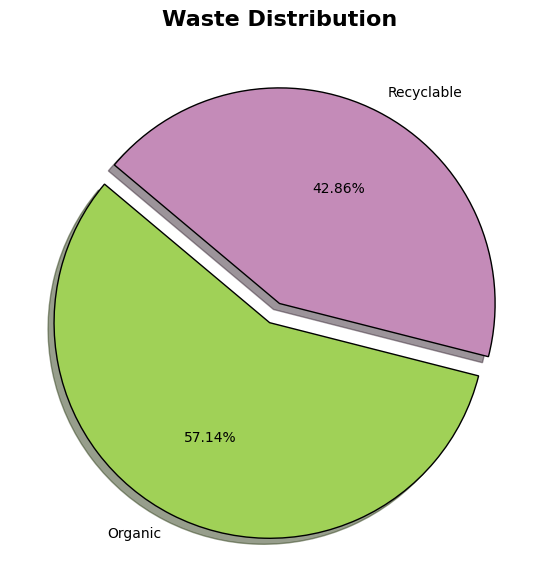

In [11]:
import matplotlib.pyplot as plt

# Sample data - Replace with your actual data
data = pd.DataFrame({
    'label': ['Organic', 'Recyclable', 'Organic', 'Recyclable', 'Organic', 'Organic', 'Recyclable']
})

# Define colors and labels
colors = ["#a0d157", "#c48bb8"]
labels = ['Organic', 'Recyclable']

# Create the pie chart
plt.figure(figsize=(7, 7))  # Make the pie chart a bit bigger
plt.pie(data['label'].value_counts(), 
        labels=labels, 
        autopct="%0.2f%%",  # Display percentage with 2 decimal places
        colors=colors, 
        startangle=140,  # Start angle to make the chart look more attractive
        explode=(0.1, 0),  # "explode" the first slice (Organic) for emphasis
        shadow=True,  # Add shadow to give a 3D effect
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})  # Add black edges to the wedges

# Add a title
plt.title("Waste Distribution", fontsize=16, fontweight='bold')

# Display the pie chart
plt.show()


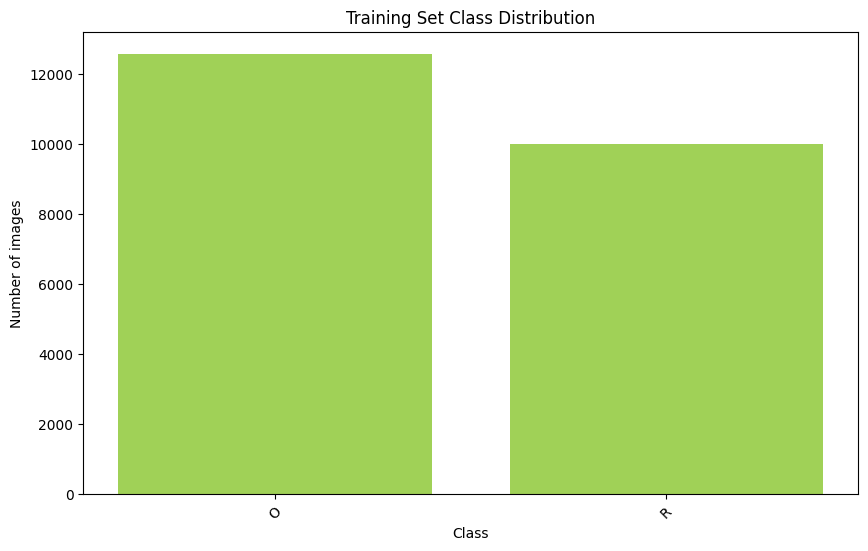

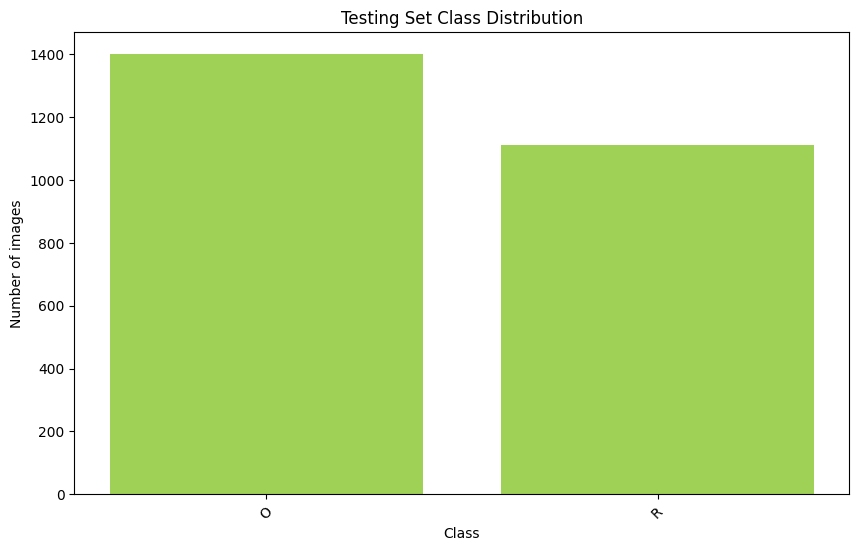

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    32,113,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,296,613 (138.46 MB)

 Trainable params: 32,246,018 (123.01 MB)

 Non-trainable params: 4,050,595 (15.45 MB)

Epoch 1/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5236 - loss: 0.8282

706/706 ━━━━━━━━━━━━━━━━━━━━ 1653s 2s/step - accuracy: 0.5236 - loss: 0.8281 - val_accuracy: 0.4425 - val_loss: 1.5290
Epoch 2/20
686/706 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.5406 - loss: 0.6961

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import seaborn as sns
from glob import glob
import os

# Suppress warnings
warnings.filterwarnings('ignore')

# Paths to your dataset (adjust paths if needed)
train_path = "Dataset/TRAIN"
test_path = "Dataset/TEST"

# Data Analysis
# Load all filenames from the training and testing directories
train_categories = os.listdir(train_path)
test_categories = os.listdir(test_path)

# Class distribution visualization
def plot_class_distribution(path, title="Class Distribution"):
    class_counts = [len(os.listdir(os.path.join(path, category))) for category in os.listdir(path)]
    plt.figure(figsize=(10, 6))
    plt.bar(os.listdir(path), class_counts, color="#a0d157")
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Number of images")
    plt.xticks(rotation=45)
    plt.show()

plot_class_distribution(train_path, "Training Set Class Distribution")
plot_class_distribution(test_path, "Testing Set Class Distribution")

# Data Augmentation
image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,   # More aggressive random rotations
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

image_gen_val = ImageDataGenerator(rescale=1./255)  # Only rescaling for validation data

# Flow from directory (This loads data in batches directly from disk)
train_generator = image_gen_train.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=True
)

validation_generator = image_gen_val.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

# Model Architecture: EfficientNetB0 + Custom Dense Layers
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the convolutional base layers

# Constructing the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Output layer for binary classification (adjust if more classes)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

# Callbacks for better training performance
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint]
)

# Visualize the training history
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Confusion Matrix
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# True Labels
true_labels = validation_generator.classes

conf_matrix = confusion_matrix(true_labels, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), 
            yticklabels=validation_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report (precision, recall, f1-score)
print(classification_report(true_labels, y_pred_classes))

# ROC Curve and AUC (only works if there are more than 2 classes, binary example here)
fpr, tpr, thresholds = roc_curve(true_labels, y_pred[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


Loading images from dataset/TRAIN\R: 100%|██████████| 9999/9999 [01:08<00:00, 145.57it/s]


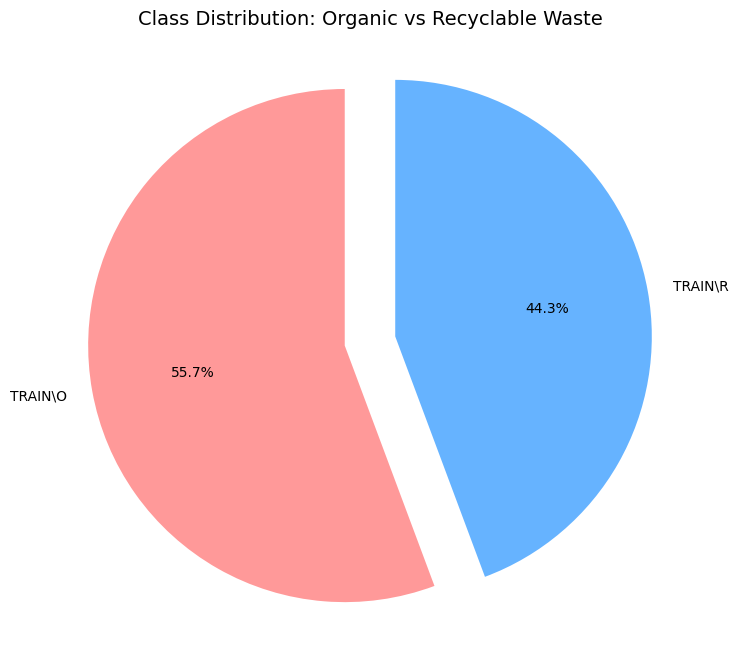

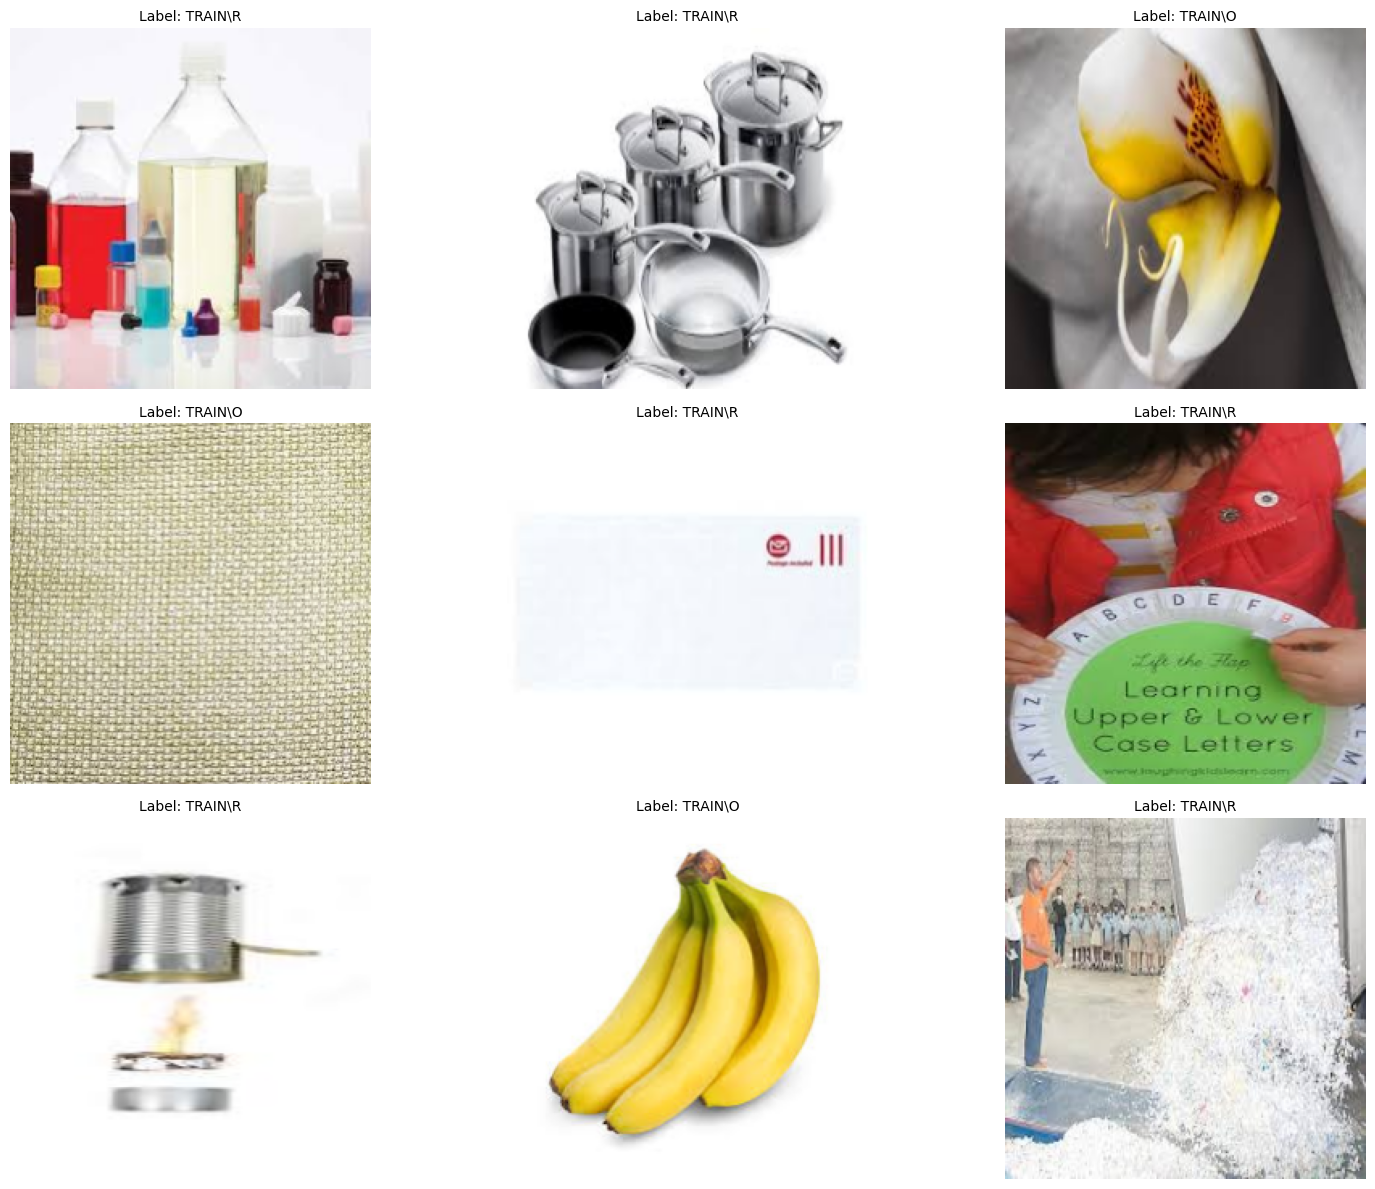

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,801,090 (98.42 MB)

 Trainable params: 25,800,642 (98.42 MB)

 Non-trainable params: 448 (1.75 KB)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.
Epoch 1/15
 3/89 ━━━━━━━━━━━━━━━━━━━━ 39:35:07 1657s/step - accuracy: 0.5449 - loss: 1.5982

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from glob import glob

# Set paths for datasets
train_path = "dataset/TRAIN"
test_path = "dataset/TEST"

# Suppress warnings for a cleaner output
import warnings
warnings.filterwarnings('ignore')

# Efficient Image Loading & Data Collection
x_data = []
y_data = []

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*'), desc=f"Loading images from {category}"):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        img_array = cv2.resize(img_array, (224, 224))  
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])

# Converting list to DataFrame for better structure
data = pd.DataFrame({'image': x_data, 'label': y_data})

# Plotting Pie Chart with Enhanced Design
plt.figure(figsize=(8, 8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(data.label.value_counts(), labels=data.label.value_counts().index, autopct='%1.1f%%',
        colors=colors, startangle=90, explode=[0.1, 0.1])
plt.title('Class Distribution: Organic vs Recyclable Waste', fontsize=14)
plt.axis('equal') 
plt.show()

# Display random images with improved layout
plt.figure(figsize=(16, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    index = np.random.randint(len(data))
    plt.imshow(data.image[index])
    plt.title(f"Label: {data.label[index]}", fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()

# Model Architecture with Optimizations
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(2, activation='softmax'))  

# Optimizer and Compilation
optimizer = Adam(learning_rate=0.0001)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

model.summary()

# Data Augmentation with Advanced Techniques
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Data Generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=256,
    color_mode="rgb",
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=256,
    color_mode="rgb",
    class_mode="categorical"
)

# Callbacks for Better Training Monitoring
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_waste_model.h5', monitor='val_accuracy', save_best_only=True)

# Model Training with Callbacks
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator,
    callbacks=[early_stopping, checkpoint]
)

# Plotting Accuracy and Loss Curves for Improved Analysis
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Save the Final Model
model.save('final_waste_classification_model.h5')

# Performance Evaluation on Test Data
score = model.evaluate(test_generator)
print(f"Test Loss: {score[0]}, Test Accuracy: {score[1]}")





Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
706/706 ━━━━━━━━━━━━━━━━━━━━ 1404s 2s/step - accuracy: 0.7771 - loss: 0.7357 - val_accuracy: 0.8567 - val_loss: 0.3992
Epoch 2/2
706/706 ━━━━━━━━━━━━━━━━━━━━ 1404s 2s/step - accuracy: 0.8465 - loss: 0.3771 - val_accuracy: 0.8961 - val_loss: 0.3006


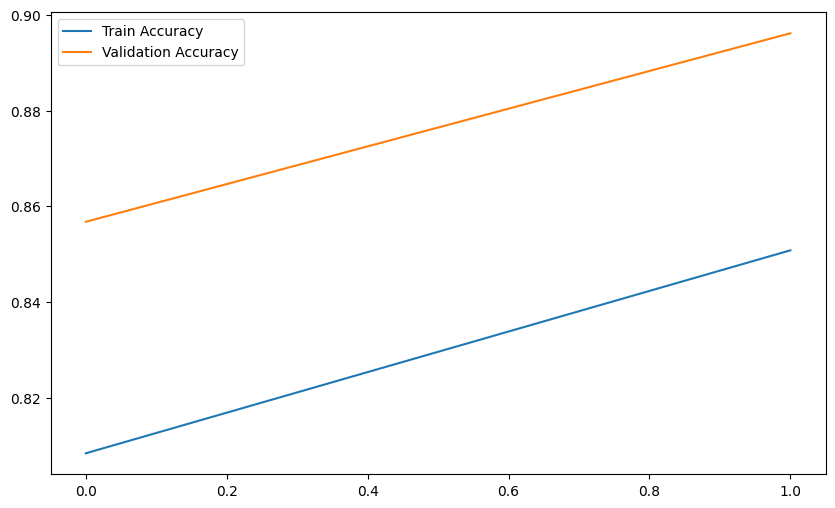

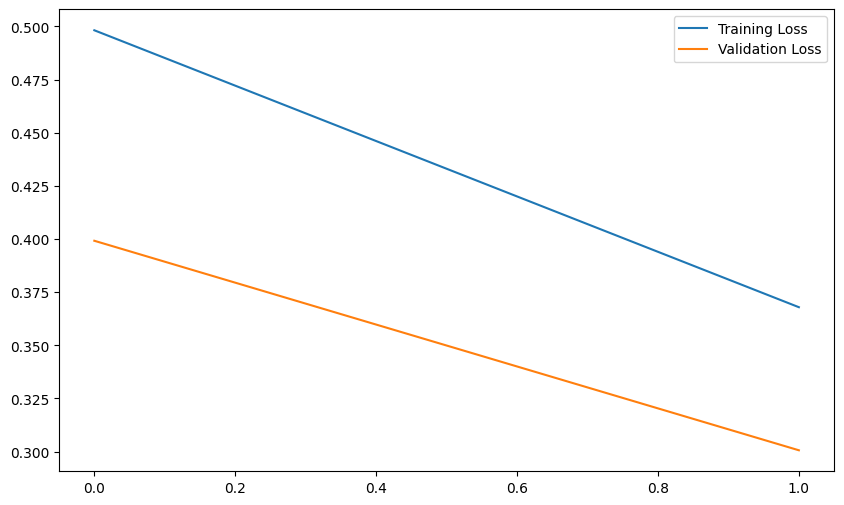

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


<Figure size 600x400 with 0 Axes>

In [4]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# Define paths for dataset and the model
train_path = r'C:\Users\user\OneDrive\Desktop\waste classification\Dataset\train'  # Update path to your 'train' folder
test_path = r'C:\Users\user\OneDrive\Desktop\waste classification\Dataset\test'  # Update path to your 'test' folder
batch_size = 32  # Set batch size

# Data preprocessing with ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values between 0 and 1
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the train generator
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"  # For multi-class classification
)

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)

# Model building
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # For 2 classes: recyclable and organic waste
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with 2 epochs
hist = model.fit(
    train_generator,
    epochs=2,  # Change from 5 to 2 epochs
    validation_data=test_generator
)

# Plot accuracy
plt.figure(figsize=(10, 6))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(10, 6))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Prediction function
def predict_fun(img):
    # Display image
    plt.figure(figsize=(6, 4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    
    # Preprocessing the image
    img = cv2.resize(img, (224, 224))  # Resize image to match model input
    img = np.reshape(img, [-1, 224, 224, 3])  # Reshape for prediction
    
    # Get prediction from the model
    result = np.argmax(model.predict(img))  # Predict class (0 or 1)
    
    # Map result to class labels
    if result == 0:
        print('The image shown is Recyclable Waste')
    elif result == 1:
        print('The image shown is Organic Waste')

# Example usage of the predict_fun function
# Test image 1 (Recyclable Waste)
test_img = cv2.imread(r'C:\Users\user\OneDrive\Desktop\waste classification\Dataset\test\Recyclable Waste\R_10028.jpg')
predict_fun(test_img)

# Test image 2 (Organic Waste)
test_img = cv2.imread(r'C:\Users\user\OneDrive\Desktop\waste classification\Dataset\test\Organic Waste\O_12926.jpg')
predict_fun(test_img)


Found 2513 images belonging to 2 classes.
79/79 ━━━━━━━━━━━━━━━━━━━━ 334s 4s/step


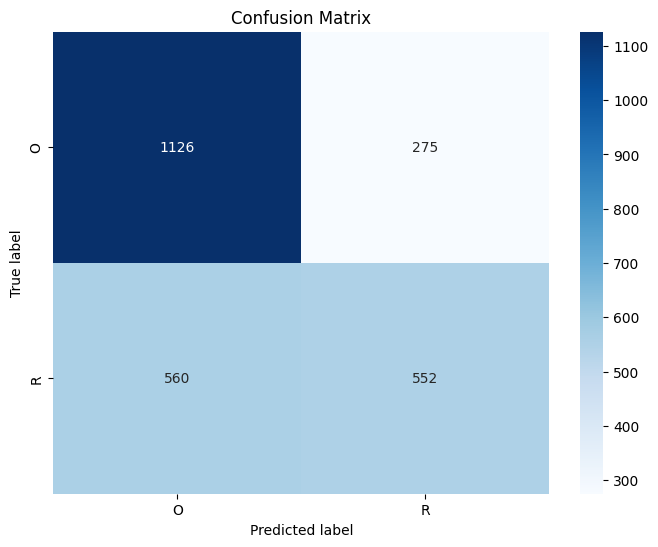

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to the dataset
test_path = r'C:\Users\user\OneDrive\Desktop\waste classification\Dataset\test'
batch_size = 32

# Load the pre-trained model
model = load_model('best_model.h5')  # Load the model you've saved earlier

# Data preprocessing for the test set (no augmentation here)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
    shuffle=False  # Important to keep the order of images for accurate confusion matrix
)

# Predict the labels for test data
test_predictions = model.predict(test_generator, verbose=1)

# Get the true labels from the test generator
test_labels = test_generator.classes  # True labels

# Get the predicted classes (index with max probability)
predicted_classes = np.argmax(test_predictions, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_labels, predicted_classes)

# Get class labels from the test generator
class_labels = list(test_generator.class_indices.keys())

# Plot confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()

# Display the confusion matrix
plot_confusion_matrix(cm, classes=class_labels)
